<a href="https://colab.research.google.com/github/NevermindGust/IA_Python_Aulas/blob/main/A3_MarvelMovie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contextualização:
Dataset contendo dados de filmes da Marvel.

Considerando que os dados mais recentes do nosso dataset são de 2022, vamos analisar algumas características da indústria cinematográfica daquele ano.

Em 2022, a receita de bilheteria aumentou em 27%, resultando em uma arrecadação total de por volta de 26 bilhões de dólares. Analizando o Top 10 Filmes Mais Lucrativos, 3 deles eram filmes da Marvel.

Com base na quantidade de dinheiro investido, podemos facilmente concluir que a indústria cinematográfica é altamente competitiva, por tanto nosso objetivo com essa database é apresentar um sistema que possa analisar os dados do filmes anteriores e baseado nas informações dadas pelo usuário, extrapolar dados para predição do sucesso do filme.

O intuito é que essa predições, inicialmente, sejam dada pela correlação entre o período que o filme será lançado, o orçamento para produção do filme ou a meta de arrecadação mundial.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Marvel_final.xlsx to Marvel_final (1).xlsx


In [ ]:
!ls

for fn in uploaded.keys():
  print('Arquivo "{name}" com tamanho de {lenght} bytes'.format(name=fn, lenght=len(uploaded[fn])))

Marvel_final.xlsx  sample_data
Arquivo "Marvel_final (1).xlsx" com tamanho de 13942 bytes


In [ ]:
marvel = pd.read_excel('Marvel_final.xlsx')
#mostra a estrutura da tabela
marvel.shape

(64, 9)

In [ ]:
#dicionario com o nome das colunas
marvel.columns

Index(['Title', 'Distributor', 'ReleaseDateUS', 'Budget',
       'OpeningWeekendNorthAmerica', 'NorthAmerica', 'OtherTerritories',
       'Worldwide', 'ReleaseDateUSNumber'],
      dtype='object')

In [ ]:
#deletando colunas desnecessarias
td = pd.concat([marvel,Distributor,Title],axis=1)
marvel.drop(['Distributor', 'Title'], axis=1, inplace=True)

KeyError: "['Distributor', 'Title'] not found in axis"

In [ ]:
#contando os valores vazios
marvel.isnull().sum()

Title                         0
Distributor                   0
ReleaseDateUS                 0
Budget                        0
OpeningWeekendNorthAmerica    0
NorthAmerica                  0
OtherTerritories              0
Worldwide                     0
ReleaseDateUSNumber           0
dtype: int64

In [65]:
marvel.head(5)

,ReleaseDateUS,Budget,OpeningWeekendNorthAmerica,NorthAmerica,OtherTerritories,Worldwide,ReleaseDateUSNumber
0,agosto,37000000,5070136,16295774,21667000,37962774,8
1,agosto,45000000,17073856,70087718,61095812,131183530,8
2,julho,75000000,54471475,157299717,139039810,296339527,7
3,março,54000000,32528016,82348319,72661713,155010032,3
4,maio,139000000,114844116,403706375,418002176,821708551,5


**Title:** título do filme  
**ReleaseDateUS:** data de lançamento no EUA(alterado para apenas 'mês' com BI)  
**Budget:** orçamento da produção  
**OpeningWeekendNorthAmerica:** arrecadação na semana de lançamento na América do Norte  
**NorthAmerica:** arrecadação total no EUA  
**OtherTerritories:** arrecadação total nos demais países  
**Worldwide:** soma da arrecadação dos EUA e nos demais territórios  

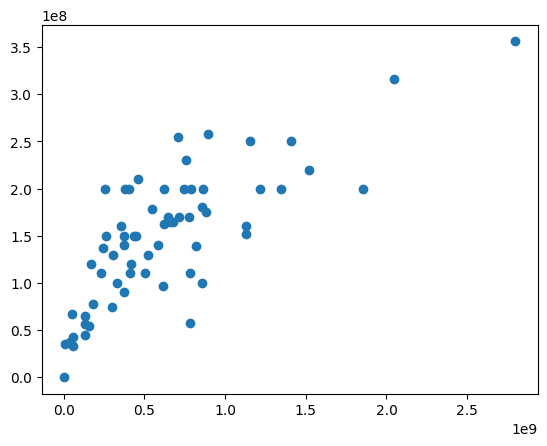

In [ ]:
#analisando a relação entre orçamento X total arrecadado
y = marvel['Budget']
x = marvel['Worldwide']
plt.scatter(x, y)
plt.show()

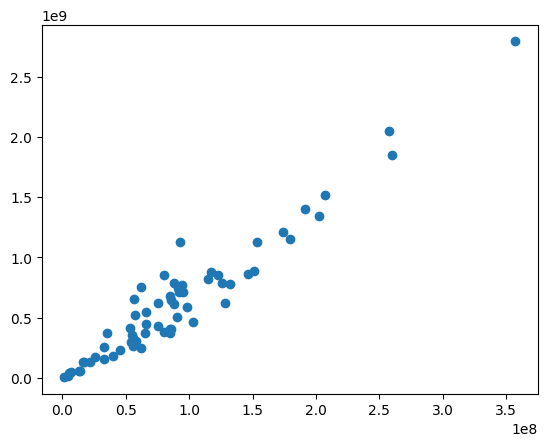

In [ ]:
#analisando a relação entre arrecadação na semana de lançamento X arrecadação mundial
x = marvel['OpeningWeekendNorthAmerica']
y = marvel['Worldwide']
plt.scatter(x, y)
plt.show()

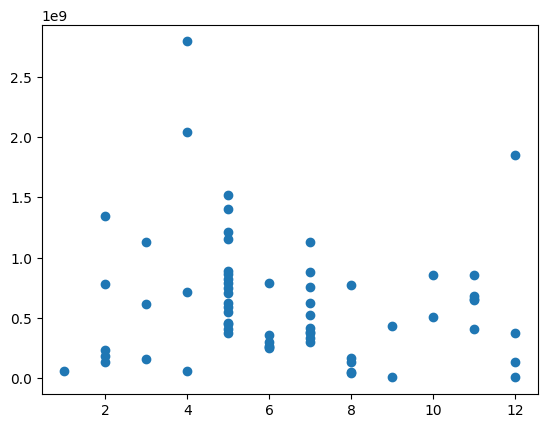

In [ ]:
#analisando a relação entre mês de lançamento X arrecadação mundial
x = marvel['ReleaseDateUSNumber']
y = marvel['Worldwide']
prev1 = plt.scatter(x, y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(marvel.drop('Worldwide',axis=1), marvel['Worldwide'], test_size=0.40, random_state=101)


In [ ]:
X_train

,Title,Distributor,ReleaseDateUS,Budget,OpeningWeekendNorthAmerica,NorthAmerica,OtherTerritories,ReleaseDateUSNumber
38,Fantastic Four,20th Century Fox,agosto,120000000,25685737,56117548,111765333,8
7,Hulk,Universal Pictures,junho,137000000,62128420,132177234,113183246,6
3,Blade II,New Line Cinema,março,54000000,32528016,82348319,72661713,3
39,Deadpool,20th Century Fox,fevereiro,58000000,132434600,363070709,420042270,2
53,Spider-Man: Into the Spider-Verse,Sony Pictures,dezembro,90000000,35363376,190241310,185299521,12
30,Thor: The Dark World,Walt Disney Studios Motion Pictures,novembro,170000000,85737841,206362140,438209262,11
45,Spider-Man: Homecoming,Sony Pictures,julho,175000000,117027503,334201140,545965784,7
56,Dark Phoenix,20th Century Fox,junho,200000000,32828348,65845974,186597000,6
50,Deadpool 2,20th Century Fox,maio,110000000,125507153,324591735,460455185,5
59,Black Widow,Walt Disney Studios Motion Pictures,julho,200000000,80366312,183651665,195979696,7


In [ ]:
y_test

22     449326618
16     301913131
2      296339527
25     132563930
61     502050366
55    2797800564
21     623933331
48    1346913161
58      48675066
51     622674139
32     708982323
1      131183530
26    1518812988
36    1405403694
41     543934105
37     519311965
15     890871626
42     677718395
35     657827828
18     263427551
33     747862775
14     228738393
60     432243292
27     757930663
24     370569774
20     373062864
Name: Worldwide, dtype: int64

In [66]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs',max_iter=200)


logmodel.fit(X_train,y_train)

ValueError: could not convert string to float: 'Fantastic Four'